# Singular Value Decomposition of an Image

https://gist.github.com/frankcleary/4d2bd178708503b556b0

## Introduction

In my introduction to singular value decomposition (link to notebook), I mentioned that singular value decomposition has applications in image compression. Here I'll give a bit more explanation of how that works, and showcase some of the tools for manipulating images in python. The key here is that a black and white image is just a matrix where the numbers represent the intensity of a given pixel, which can be decomposed just like any other.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

from PIL import Image

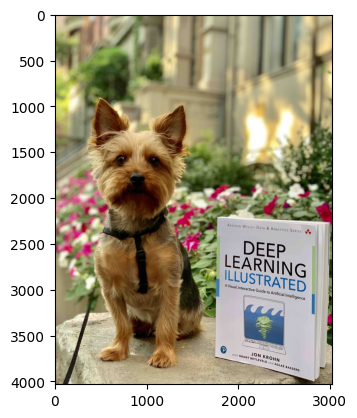

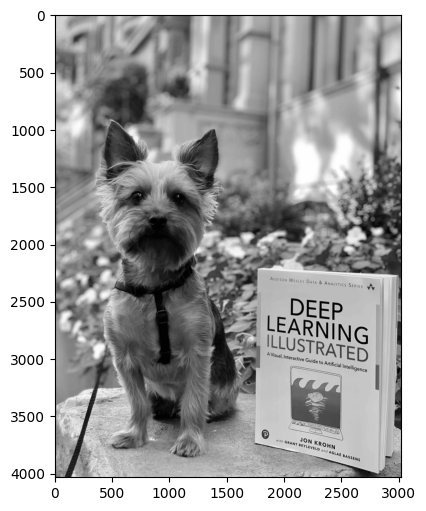

In [4]:
img = Image.open('oboe-with-book.jpg')
plt.imshow(img)
imggray = img.convert('LA')
plt.figure(figsize=(9, 6))
plt.imshow(imggray);

np array creation time:  0.6864590644836426
shape:  4032 3024
np matrix creation time:  0.02780914306640625
image show time:  0.07166433334350586


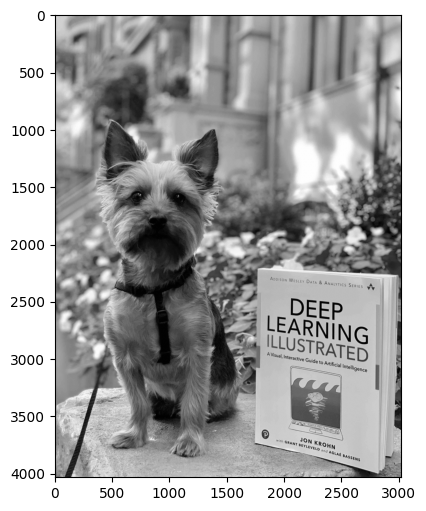

In [9]:
start = time.time()
imgmat = np.array(list(imggray.getdata(band=0)), float)
print('np array creation time: ', time.time() - start)
print('shape: ', imggray.size[1], imggray.size[0])
imgmat.shape = (imggray.size[1], imggray.size[0])
start = time.time()
imgmat = np.matrix(imgmat)
print('np matrix creation time: ', time.time() - start)
start = time.time()
plt.figure(figsize=(9,6))
plt.imshow(imgmat, cmap='gray');
print('image show time: ', time.time() - start)

In [23]:
start = time.time()
U, sigma, V = np.linalg.svd(imgmat)
print('svd time: ', time.time() - start)
V
print(U.shape, sigma.shape, V.shape)

svd time:  15.293200969696045
(4032, 4032) (3024,) (3024, 3024)


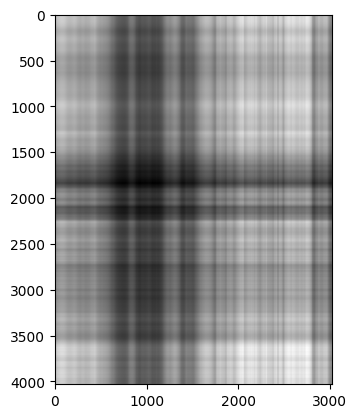

In [18]:
reconstimg = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(V[:1, :])
plt.imshow(reconstimg, cmap='gray');

shape:  (4032, 2) (2, 2) (2, 3024) (4032, 3024)


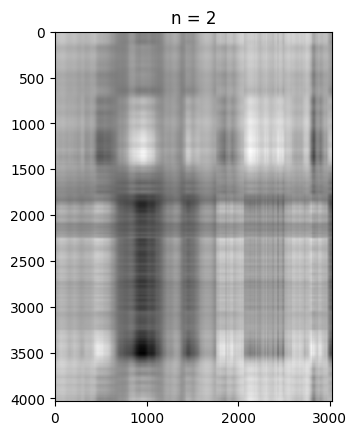

shape:  (4032, 3) (3, 3) (3, 3024) (4032, 3024)


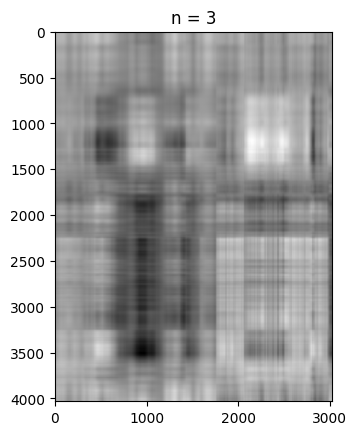

In [22]:
for i in range(2, 4):
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    print('shape: ', np.matrix(U[:, :i]).shape, np.diag(sigma[:i]).shape, np.matrix(V[:i, :]).shape, reconstimg.shape)
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

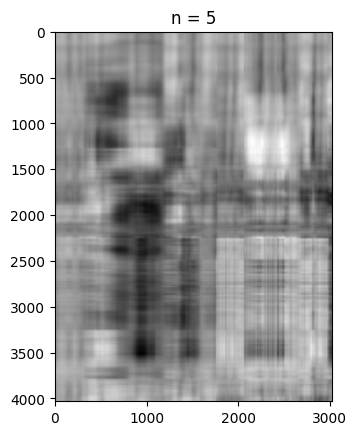

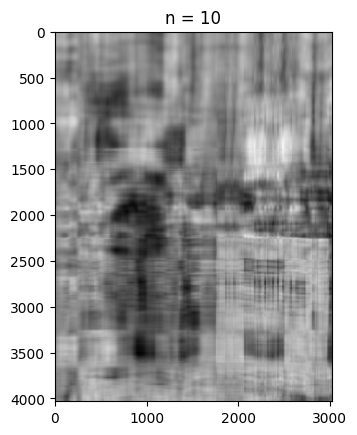

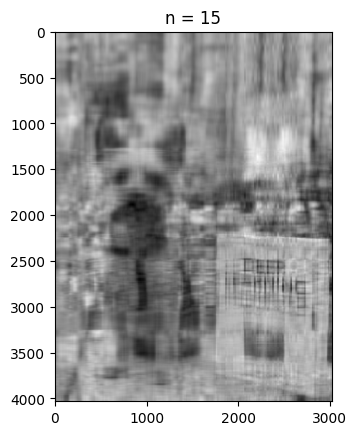

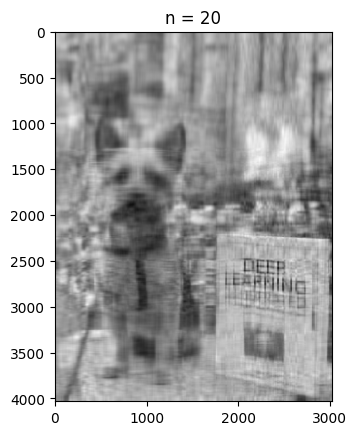

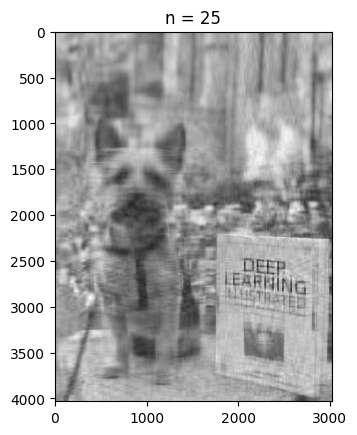

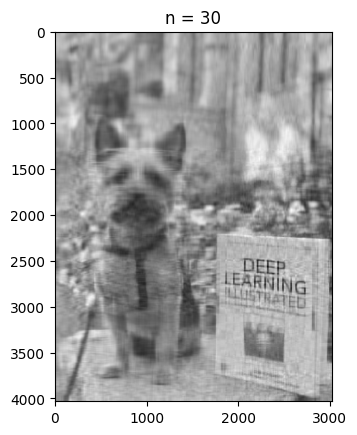

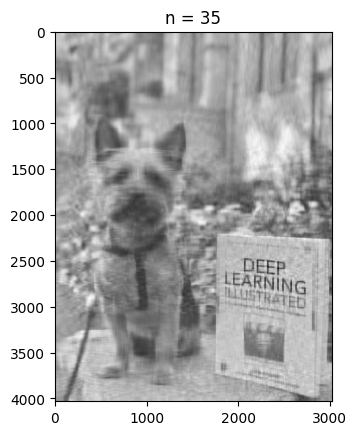

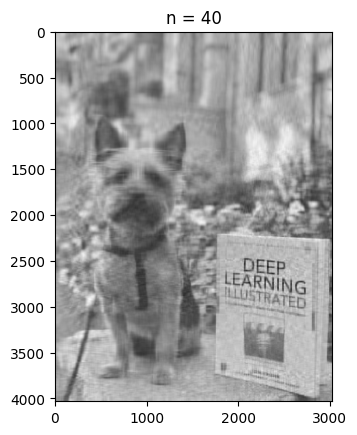

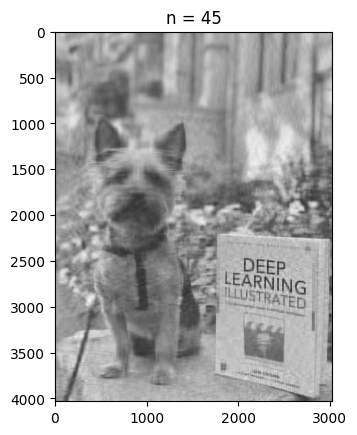

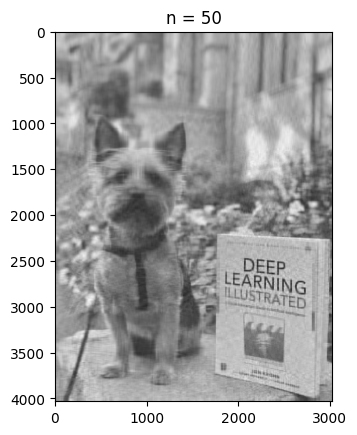

In [21]:
for i in range(5, 51, 5):
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()